<a href="https://colab.research.google.com/github/Sudheer-Arora/Time-Series/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the data

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Alcohol_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df.columns=['Date','Sales']

In [ ]:
df

,Date,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


<Axes: >

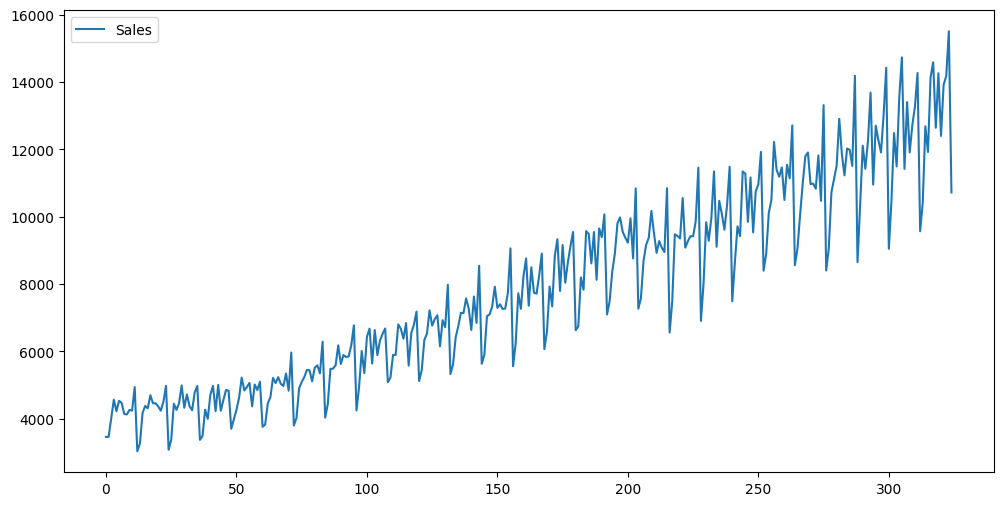

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    325 non-null    object
 1   Sales   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


Time-Series using LSTM

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95,shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
"""
Line 1: scaled_train = scaler.fit_transform(train['Sales'].values[:, np.newaxis])
train['Sales']: This extracts the 'Sales' column from the train DataFrame. The result is a pandas Series containing the sales data for the training set.

.values: This converts the pandas Series into a NumPy array. The result is a 1-dimensional NumPy array of sales values.

[:, np.newaxis]: This adds an extra dimension to the NumPy array, converting it from a shape of (n,) to (n, 1). This reshaping is necessary because the fit_transform method expects a 2-dimensional input.

scaler.fit_transform(...): This applies the fit_transform method of the scaler object (an instance of StandardScaler from scikit-learn) to the reshaped sales data.

fit_transform: This method performs two operations:
fit: It calculates the mean and standard deviation of the training data.
transform: It uses the calculated mean and standard deviation to standardize the data, i.e., it scales the data such that it has a mean of 0 and a standard deviation of 1.
scaled_train: The standardized (scaled) sales data for the training set is stored in the scaled_train variable.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Line 2: scaled_test = scaler.transform(test['Sales'].values[:, np.newaxis])
test['Sales']: This extracts the 'Sales' column from the test DataFrame. The result is a pandas Series containing the sales data for the test set.

.values: This converts the pandas Series into a NumPy array. The result is a 1-dimensional NumPy array of sales values.

[:, np.newaxis]: This adds an extra dimension to the NumPy array, converting it from a shape of (n,) to (n, 1).

scaler.transform(...): This applies the transform method of the scaler object to the reshaped sales data.

transform: This method uses the mean and standard deviation calculated from the training data (during the fit step) to standardize the test data. It scales the test data using the same parameters as the training data to ensure consistency.
scaled_test: The standardized (scaled) sales data for the test set is stored in the scaled_test variable.

Summary
scaled_train: Contains the standardized sales data for the training set, where the mean and standard deviation were calculated based on the training data.
scaled_test: Contains the standardized sales data for the test set, using the same mean and standard deviation as the training data to ensure consistency and comparability.
"""

"\nLine 1: scaled_train = scaler.fit_transform(train['Sales'].values[:, np.newaxis])\ntrain['Sales']: This extracts the 'Sales' column from the train DataFrame. The result is a pandas Series containing the sales data for the training set.\n\n.values: This converts the pandas Series into a NumPy array. The result is a 1-dimensional NumPy array of sales values.\n\n[:, np.newaxis]: This adds an extra dimension to the NumPy array, converting it from a shape of (n,) to (n, 1). This reshaping is necessary because the fit_transform method expects a 2-dimensional input.\n\nscaler.fit_transform(...): This applies the fit_transform method of the scaler object (an instance of StandardScaler from scikit-learn) to the reshaped sales data.\n\nfit_transform: This method performs two operations:\nfit: It calculates the mean and standard deviation of the training data.\ntransform: It uses the calculated mean and standard deviation to standardize the data, i.e., it scales the data such that it has a mea

In [ ]:
scaled_train = scaler.fit_transform(train['Sales'].values[:, np.newaxis])
scaled_test = scaler.transform(test['Sales'].values[:, np.newaxis])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855]
Predict this y: 
 [[0.13103684]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=10,verbose=1)

Epoch 1/10
305/305 [==============================] - 10s 13ms/step - loss: 0.0358
Epoch 2/10
305/305 [==============================] - 4s 13ms/step - loss: 0.0101
Epoch 3/10
305/305 [==============================] - 4s 12ms/step - loss: 0.0103
Epoch 4/10
305/305 [==============================] - 2s 7ms/step - loss: 0.0099
Epoch 5/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0101
Epoch 6/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0095
Epoch 7/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0095
Epoch 8/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0095
Epoch 9/10
305/305 [==============================] - 3s 9ms/step - loss: 0.0095
Epoch 10/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0095


In [ ]:
from tqdm import tqdm
test_predictions = []
first_eval_batch = scaled_train[-n_input:,:,np.newaxis]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in tqdm(range(len(test))):
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  0%|          | 0/17 [00:00<?, ?it/s]

1/1 [==============================] - 0s 196ms/step


  6%|▌         | 1/17 [00:00<00:03,  4.01it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 3/17 [00:00<00:01,  9.06it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 5/17 [00:00<00:00, 12.07it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 7/17 [00:00<00:00, 13.89it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 9/17 [00:00<00:00, 14.84it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 11/17 [00:00<00:00, 15.16it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 13/17 [00:00<00:00, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 15/17 [00:01<00:00, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████| 17/17 [00:01<00:00, 13.55it/s]


In [ ]:
test_predictions

[array([0.86434066], dtype=float32),
 array([0.8040531], dtype=float32),
 array([0.84419745], dtype=float32),
 array([0.8284604], dtype=float32),
 array([0.8140795], dtype=float32),
 array([0.82017404], dtype=float32),
 array([0.81156063], dtype=float32),
 array([0.8057435], dtype=float32),
 array([0.8037522], dtype=float32),
 array([0.7982434], dtype=float32),
 array([0.7939857], dtype=float32),
 array([0.7904079], dtype=float32),
 array([0.7861136], dtype=float32),
 array([0.78229725], dtype=float32),
 array([0.7786468], dtype=float32),
 array([0.77492833], dtype=float32),
 array([0.7714221], dtype=float32)]

In [ ]:
"""
This step is crucial for interpreting and evaluating the model's performance in a meaningful way,
as it translates the predictions back to a scale that makes sense for the specific business or application.
"""
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[13142.92141593],
       [12437.61754173],
       [12907.26599175],
       [12723.15816504],
       [12554.91634059],
       [12626.21607536],
       [12525.44781971],
       [12457.39338773],
       [12434.09679961],
       [12369.64957678],
       [12319.83899033],
       [12277.98197579],
       [12227.74323809],
       [12183.09556997],
       [12140.38922608],
       [12096.88654876],
       [12055.86700922]])

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test

,Date,Sales,Predictions
308,2017-09-01,11907,13142.921416
309,2017-10-01,12711,12437.617542
310,2017-11-01,13261,12907.265992
311,2017-12-01,14265,12723.158165
312,2018-01-01,9564,12554.916341
313,2018-02-01,10415,12626.216075
314,2018-03-01,12683,12525.447820
315,2018-04-01,11919,12457.393388
316,2018-05-01,14138,12434.096800
317,2018-06-01,14583,12369.649577


<Axes: >

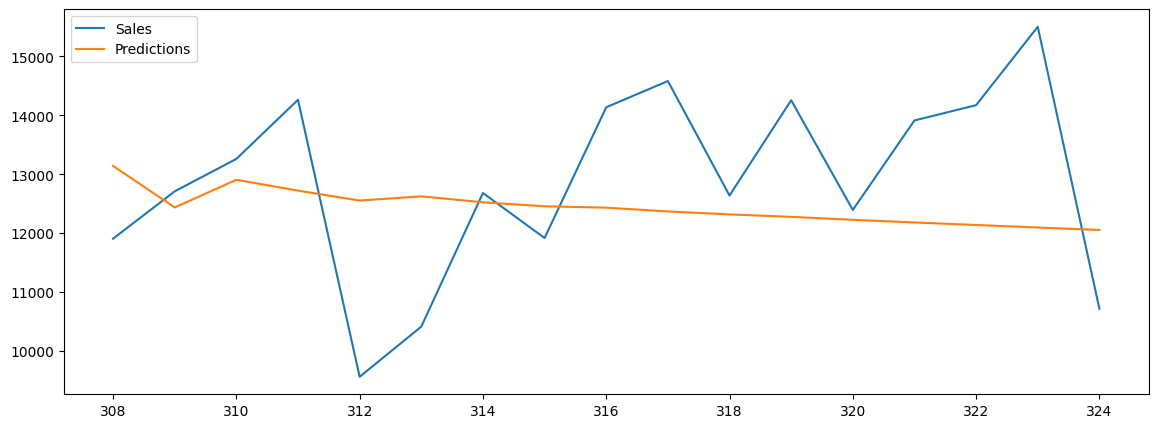

In [ ]:
test.plot(figsize=(14,5))

### **ARIMA**

In [ ]:
!pip install pmdarima
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Alcohol_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df.columns=['Date','Sales']

In [ ]:
"""
The following code performs the Augmented Dickey-Fuller (ADF) test to check for stationarity in a time series dataset.
The ADF test is a statistical test used to determine whether a time series is stationary or has a unit root (i.e., it is non-stationary).

results help determine whether the time series is stationary. If the p-value is below a certain threshold (commonly 0.05),
the null hypothesis (that the series has a unit root) can be rejected, indicating that the series is stationary.
"""


from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sales'])

1. ADF :  2.037404725913703
2. P-Value :  0.9987196267088919
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


Transforming the data

In [ ]:
df_diff=df['Sales'].diff().dropna()

In [ ]:
ad_test(df_diff)

1. ADF :  -4.365959619246081
2. P-Value :  0.0003408284921169623
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


In [ ]:
df['new_sale']=df_diff
df

,Date,Sales,new_sale
0,1992-01-01,3459,NaN
1,1992-02-01,3458,-1.0
2,1992-03-01,4002,544.0
3,1992-04-01,4564,562.0
4,1992-05-01,4221,-343.0
...,...,...,...
320,2018-09-01,12396,-1861.0
321,2018-10-01,13914,1518.0
322,2018-11-01,14174,260.0
323,2018-12-01,15504,1330.0


<Axes: >

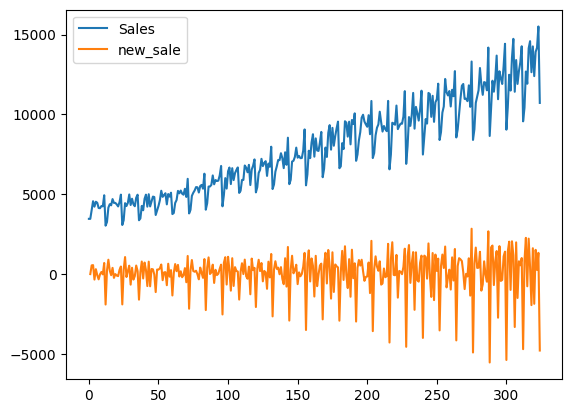

In [ ]:
df.plot()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95,shuffle=False)

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['new_sale'][1:]

1        -1.0
2       544.0
3       562.0
4      -343.0
5       308.0
        ...  
320   -1861.0
321    1518.0
322     260.0
323    1330.0
324   -4786.0
Name: new_sale, Length: 324, dtype: float64

In [ ]:
stepwise_fit = auto_arima(df['new_sale'][1:],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  324
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2687.767
Date:                Wed, 17 Jul 2024   AIC                           5385.534
Time:                        05:42:28   BIC                           5404.438
Sample:                             0   HQIC                          5393.079
                                - 324                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     57.7193      5.633     10.247      0.000      46.680      68.759
ar.L1         -0.9992      0.008   -125.093      0.000      -1.015      -0.984
ma.L1          0.0348      0.031      1.121      0.262      -0.026       0.096
ma.L2         -0.9437      0.033    -28.297      0.000      -1.009      -0.878
sigma2      9.287e+05      0.000    8.8e+09      0.000    9.29e+05    9.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.90   Jarque-Bera (JB):                17.34
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.27e+25. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q=1,0,2
model=ARIMA(train['new_sale'],order=(p,d,q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               new_sale   No. Observations:                  308
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2538.918
Date:                Wed, 17 Jul 2024   AIC                           5087.836
Time:                        05:42:29   BIC                           5106.486
Sample:                             0   HQIC                          5095.293
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1462      2.591     10.865      0.000      23.069      33.224
ar.L1         -0.4363      0.621     -0.703      0.482      -1.653       0.781
ma.L1         -0.4306      0.597     -0.721      0.471      -1.601       0.740
ma.L2         -0.5129      0.567     -0.904      0.366      -1.625       0.599
sigma2      8.857e+05   6.29e+04     14.091      0.000    7.62e+05    1.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                40.76
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               4.64   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

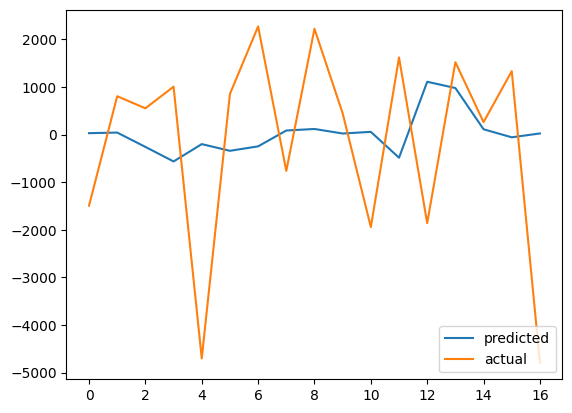

In [ ]:
import matplotlib.pyplot as plt
start=1
end=len(test)
pred=model.predict(start=start,end=end).rename('ARIMA')
pred=pred.reset_index(drop=True)
test=test.reset_index(drop=True)
plt.plot(pred)
plt.plot(test['new_sale'])
plt.legend(["predicted", "actual"], loc ="lower right")
plt.show()

### Time Series Classification with TSAI 🔥

[TSAI](https://https://timeseriesai.github.io/tsai/)
---



In [ ]:
!pip install tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x8

In [ ]:
from tsai.all import *
computer_setup()

os              : Linux-6.1.85+-x86_64-with-glibc2.35
python          : 3.10.12
tsai            : 0.3.9
fastai          : 2.7.15
fastcore        : 1.5.51
torch           : 2.2.2+cu121
device          : 1 gpu (['Tesla T4'])
cpu cores       : 1
threads per cpu : 2
RAM             : 12.67 GB
GPU memory      : [15.0] GB


In [ ]:
#import dataset
import pandas as pd
df=pd.read_csv('/content/train_data.csv')
df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f42,f43,f44,f45,f46,f47,f48,f49,f50,target
0,n0d752bda055a4b2,0.52843,0.66492,0.57300,0.25224,0.39213,0.56593,0.27157,0.67453,0.55690,...,0.21561,0.65484,0.47571,0.42559,0.42302,0.47089,0.57277,0.46133,0.40266,0
1,n78c526e96e3444a,0.50478,0.53147,0.46412,0.38045,0.52160,0.50398,0.60157,0.44022,0.48668,...,0.65698,0.62031,0.59613,0.45587,0.59785,0.51325,0.47258,0.46820,0.40191,0
2,n124153d6a80b41e,0.16432,0.30201,0.43268,0.76786,0.58864,0.24046,0.46519,0.63948,0.50190,...,0.48324,0.37271,0.19784,0.42810,0.43532,0.45287,0.57780,0.67637,0.59250,0
3,n8d840c1eca9947c,0.39355,0.33501,0.76737,0.57453,0.58991,0.49938,0.42713,0.71836,0.47394,...,0.54231,0.16994,0.31166,0.66766,0.57910,0.78467,0.31459,0.39186,0.75009,0
4,n9085bca7d6274e8,0.30337,0.62905,0.70896,0.35969,0.45878,0.56114,0.45075,0.61684,0.58865,...,0.52879,0.40566,0.35881,0.59963,0.40364,0.56930,0.48503,0.50755,0.49024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,nb348479cd6a845d,0.37901,0.45696,0.61736,0.53728,0.61759,0.41462,0.43887,0.70277,0.46605,...,0.44578,0.23482,0.25128,0.61243,0.37383,0.67132,0.25629,0.47408,0.63886,0
23995,n67cafe262c6c474,0.56883,0.44626,0.47341,0.36340,0.55763,0.45206,0.56804,0.71538,0.47531,...,0.35074,0.32829,0.44883,0.69204,0.44165,0.66043,0.49308,0.48315,0.50984,0
23996,n37527894cc5841a,0.44429,0.39712,0.39948,0.44728,0.45539,0.52379,0.62583,0.55642,0.63081,...,0.50469,0.56407,0.56469,0.50169,0.59774,0.53069,0.70013,0.65090,0.64804,1
23997,na247497ad9304da,0.63598,0.23455,0.37518,0.40339,0.63761,0.50392,0.81634,0.63413,0.57206,...,0.62303,0.56474,0.62624,0.49364,0.54827,0.63880,0.57199,0.44637,0.48424,1


In [ ]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8,shuffle=False)

In [ ]:
batch_tfms = TSStandardize()

In [ ]:
my_clf = TSClassifier(train_x,train_y, arch='MLSTM_FCN', batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())

lf_max = 0.0010000000474974513


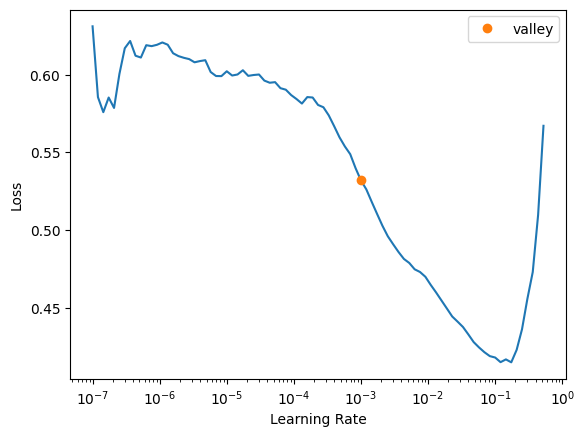

In [ ]:
lr_max = my_clf.lr_find()
print(f'lf_max = {lr_max.valley}')

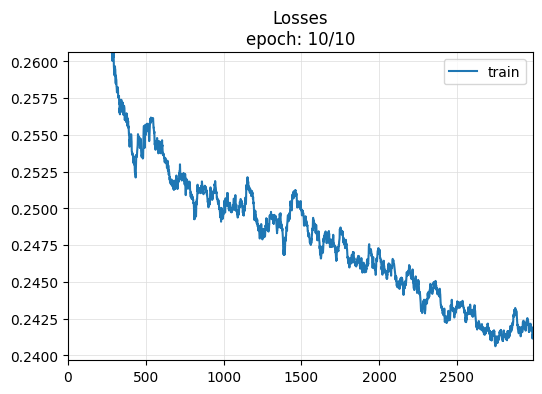

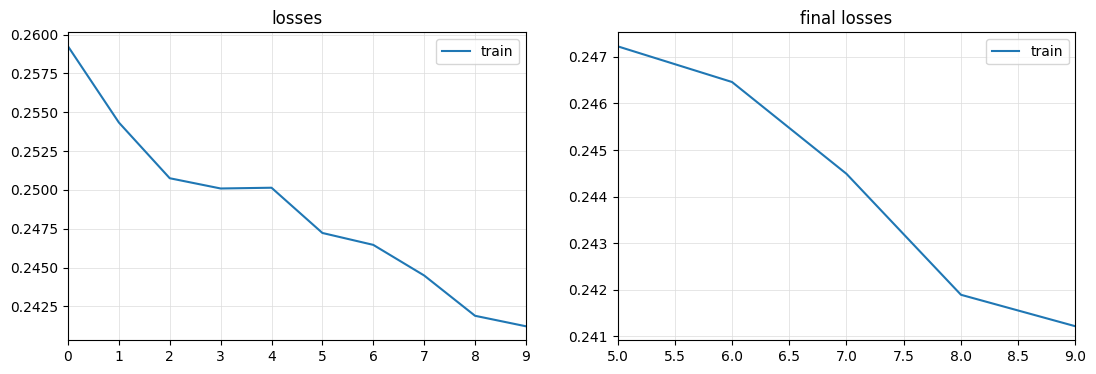

In [ ]:
my_clf.fit_one_cycle(10, lr_max=lr_max.valley)

#### save and load model

In [ ]:
my_clf.export("models/mv_clf.pkl")
from tsai.inference import load_learner
loaded_clf = load_learner("models/mv_clf.pkl")

In [ ]:
#reshaping for passing on sample at a time in predictor
x_test= test_x.reshape(-1,1,50)

In [ ]:
x_test.shape

(4800, 1, 50)

In [ ]:
probas,target, preds = loaded_clf.get_X_preds(x_test,test_y)
probas,target, preds

(tensor([[0.5043],
         [0.5162],
         [0.5397],
         ...,
         [0.4995],
         [0.3133],
         [0.4206]]),
 tensor([0, 0, 1,  ..., 1, 1, 0]),
 tensor([[0.5043],
         [0.5162],
         [0.5397],
         ...,
         [0.4995],
         [0.3133],
         [0.4206]]))

In [ ]:
r=pd.DataFrame(preds)
r

,0
0,0.504331
1,0.516227
2,0.539711
3,0.574299
4,0.504971
...,...
4795,0.577446
4796,0.419245
4797,0.499493
4798,0.313317


In [ ]:
r[0] = r[0].astype(int)
r.dtypes

0    int64
dtype: object

In [ ]:
r[0].value_counts()

0
0    4800
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, r[0]))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2456
           1       0.00      0.00      0.00      2344

    accuracy                           0.51      4800
   macro avg       0.26      0.50      0.34      4800
weighted avg       0.26      0.51      0.35      4800

